In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Загрузка данных из файлов CSV с указанием параметра low_memory=False
train_data = pd.read_csv('data/fashion-mnist_train.csv', low_memory=False)
test_data = pd.read_csv('data/fashion-mnist_test.csv', low_memory=False)

# Выводим информацию о датасете
print("Размерность данных TEST: ", test_data.shape)
print("Метки классов TEST: ", test_data['label'].unique())
# Проверка размерности данных
print("Размерность данных TRAIN без Lable: ", train_data.drop(columns=['label']).shape)

Размерность данных TEST:  (10000, 785)
Метки классов TEST:  [0 1 2 3 8 6 5 4 7 9]
Размерность данных TRAIN без Lable:  (60000, 784)


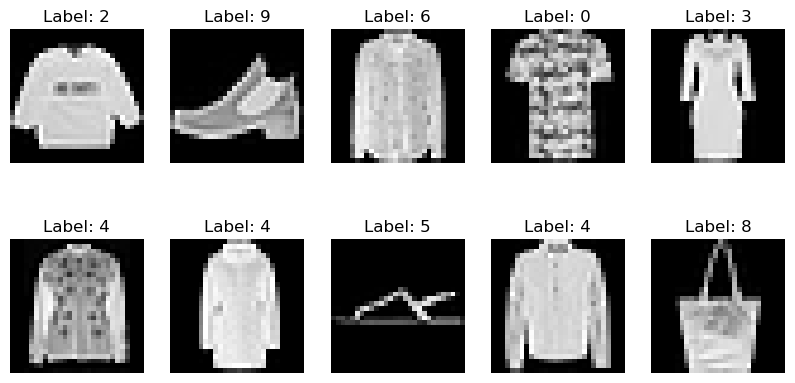

In [41]:
# Преобразование данных в массив NumPy и затем в форму изображений
train_data_images = train_data.drop(columns=['label']).values

# Проверка, что количество элементов кратно 784
if train_data_images.size % 784 == 0:
    train_data_images = train_data_images.reshape(-1, 28, 28)
else:
    print("Ошибка: количество элементов в данных не кратно 784")

# Выводим несколько изображений из датасета
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(train_data_images[i], cmap='gray')
    ax.set_title(f'Label: {train_data["label"].iloc[i]}')
    ax.axis('off')
plt.show()


In [42]:
# Разделение данных на признаки и метки
x_train = train_data.drop(columns=['label']).values
y_train = train_data['label'].values
x_test = test_data.drop(columns=['label']).values
y_test = test_data['label'].values

# Нормализация данных
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Создание модели KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7,weights='uniform',metric='minkowski')

# Обучение модели
knn.fit(x_train, y_train)

# Предсказание на тестовых данных
y_pred = knn.predict(x_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели KNeighborsClassifier: {accuracy:.4f}")

# Вывод отчета о классификации
print(classification_report(y_test, y_pred))


Точность модели KNeighborsClassifier: 0.8609
              precision    recall  f1-score   support

           0       0.77      0.87      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.79      0.78      0.78      1000
           3       0.91      0.88      0.90      1000
           4       0.79      0.81      0.80      1000
           5       0.99      0.83      0.90      1000
           6       0.66      0.61      0.63      1000
           7       0.88      0.94      0.91      1000
           8       0.98      0.94      0.96      1000
           9       0.89      0.97      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [43]:
from sklearn.ensemble import ExtraTreesClassifier

# Создание модели Extra Trees Classifier
etc = ExtraTreesClassifier()

# Обучение модели
etc.fit(x_train, y_train)

# Предсказание на тестовых данных
y_pred_etc = etc.predict(x_test)

# Оценка модели
accuracy_etc = accuracy_score(y_test, y_pred_etc)
print(f"Точность модели Extra Trees Classifier: {accuracy_etc:.4f}")

# Вывод отчета о классификации
print(classification_report(y_test, y_pred_etc))


Точность модели Extra Trees Classifier: 0.8831
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.81      0.80      1000
           3       0.89      0.93      0.91      1000
           4       0.80      0.86      0.83      1000
           5       0.97      0.94      0.96      1000
           6       0.74      0.59      0.66      1000
           7       0.92      0.94      0.93      1000
           8       0.96      0.97      0.97      1000
           9       0.94      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [44]:
from catboost import CatBoostClassifier

# Создание модели CatBoost Classifier с использованием GPU и параллельного вычисления
cbc = CatBoostClassifier(task_type='GPU', devices='0:1', thread_count=-1, verbose=0)

# Обучение модели
cbc.fit(x_train, y_train)

# Предсказание на тестовых данных
y_pred_cbc = cbc.predict(x_test)

# Оценка модели
accuracy_cbc = accuracy_score(y_test, y_pred_cbc)
print(f"Точность модели CatBoost Classifier: {accuracy_cbc:.4f}")

# Вывод отчета о классификации
print(classification_report(y_test, y_pred_cbc))

Точность модели CatBoost Classifier: 0.9072
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.86      0.84      0.85      1000
           3       0.91      0.94      0.92      1000
           4       0.86      0.88      0.87      1000
           5       0.98      0.95      0.97      1000
           6       0.77      0.71      0.74      1000
           7       0.93      0.95      0.94      1000
           8       0.97      0.98      0.97      1000
           9       0.95      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [45]:
import lightgbm as lgb

# Создание модели LightGBM Classifier
lgbm = lgb.LGBMClassifier()

# Обучение модели
lgbm.fit(x_train, y_train)

# Предсказание на тестовых данных
y_pred_lgbm = lgbm.predict(x_test)

# Оценка модели
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"Точность модели LightGBM Classifier: {accuracy_lgbm:.4f}")

# Вывод отчета о классификации
print(classification_report(y_test, y_pred_lgbm))

D:\anaconda3\envs\hw2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.180569 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 175291
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 783
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
Точность модели LightGBM Classifier: 0.9045
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1000
           1   

D:\anaconda3\envs\hw2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [47]:
import xgboost as xgb

# Создание модели XGBoost Classifier
xgb_clf = xgb.XGBClassifier()

# Обучение модели
xgb_clf.fit(x_train, y_train)

# Предсказание на тестовых данных
y_pred_xgb = xgb_clf.predict(x_test)

# Оценка модели
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Точность модели XGBoost Classifier: {accuracy_xgb:.4f}")

# Вывод отчета о классификации
print(classification_report(y_test, y_pred_xgb))

D:\anaconda3\envs\hw2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:06:26] WARNING: C:\b\abs_2dxt7xpzfb\croot\xgboost-split_1721080017223\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Точность модели XGBoost Classifier: 0.9062
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.85      0.83      0.84      1000
           3       0.92      0.93      0.92      1000
           4       0.85      0.88      0.87      1000
           5       0.99      0.96      0.98      1000
           6       0.75      0.71      0.73      1000
           7       0.95      0.96      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.91     1000

In [34]:
from sklearn.ensemble import AdaBoostClassifier

# Создание модели AdaBoost Classifier
abc = AdaBoostClassifier()

# Обучение модели
abc.fit(x_train, y_train)

# Предсказание на тестовых данных
y_pred_abc = abc.predict(x_test)

# Оценка модели
accuracy_abc = accuracy_score(y_test, y_pred_abc)
print(f"Точность модели AdaBoost Classifier: {accuracy_abc:.4f}")

# Вывод отчета о классификации
print(classification_report(y_test, y_pred_abc))


Точность модели AdaBoost Classifier: 0.5341
              precision    recall  f1-score   support

           0       0.73      0.72      0.72      1000
           1       0.97      0.78      0.87      1000
           2       0.36      0.76      0.49      1000
           3       0.59      0.81      0.69      1000
           4       0.22      0.08      0.12      1000
           5       0.80      0.45      0.57      1000
           6       0.26      0.09      0.13      1000
           7       0.07      0.00      0.01      1000
           8       0.65      0.90      0.75      1000
           9       0.37      0.75      0.50      1000

    accuracy                           0.53     10000
   macro avg       0.50      0.53      0.48     10000
weighted avg       0.50      0.53      0.48     10000

